# Deep Learning Project

In [3]:
from src import train,evaluate,loss,preprocessed,model
import importlib


In [62]:
importlib.reload(train)
importlib.reload(evaluate)
importlib.reload(loss)
importlib.reload(preprocessed)
importlib.reload(model)

<module 'src.model' from 'c:\\Users\\coren\\Projet Deep Learning\\CS230\\src\\model.py'>

## I- Download and process the data

In [51]:
years = ['2011','2012','2013','2014','2015']
for year in years:
    preprocessed.process_raw_data(year,sampling_method='NearMiss')
    print(f"the dataset for {year} is done.")

the dataset for 2011 is done.
the dataset for 2012 is done.
the dataset for 2013 is done.
the dataset for 2014 is done.
the dataset for 2015 is done.


In [54]:
df,_ = preprocessed.get_data('2012','NearMiss','train')

for col in df.columns:
    print(f"Colonne {col}: {sorted(df[col].unique())}")

Colonne Education_level: [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
Colonne Has_smoked_100_cigs: [0.0, 1.0]
Colonne Sex: [0.0, 1.0]
Colonne Healthcare_coverage: [0.0, 1.0]
Colonne MEDCOST: [0.0, 1.0]
Colonne PHYSHLTH: [0.0, 0.0333333333333333, 0.0666666666666666, 0.1, 0.1333333333333333, 0.1666666666666666, 0.2, 0.2333333333333333, 0.2666666666666666, 0.3, 0.3333333333333333, 0.3666666666666666, 0.4, 0.4333333333333333, 0.4666666666666667, 0.5, 0.5333333333333333, 0.5666666666666667, 0.6, 0.6333333333333333, 0.6666666666666666, 0.7, 0.7333333333333333, 0.7666666666666667, 0.8, 0.8333333333333334, 0.8666666666666667, 0.9, 0.9333333333333332, 0.9666666666666668, 1.0]
Colonne GENHLTH: [0.0, 0.25, 0.5, 0.75, 1.0]
Colonne Income_bracket: [0.0, 0.1428571428571428, 0.2857142857142857, 0.4285714285714285, 0.5714285714285714, 0.7142857142857143, 0.8571428571428571, 1.0]
Colonne MENTHLTH: [0.0, 0.0333333333333333, 0.0666666666666666, 0.1, 0.1333333333333333, 0.1666666666666666, 0.2, 0.2333333333333333, 0.26

## II- Testing Model

### 1- Logistic Regression

In [55]:
hyperparameters = {'penality' : None,
                   'solver' : 'lbfgs',
                   'epoch' : 1000}

c:\Users\coren\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy train: 0.7591
Accuracy test: 0.7407
F1 Score train: 0.7656
F1 Score test: 0.4470


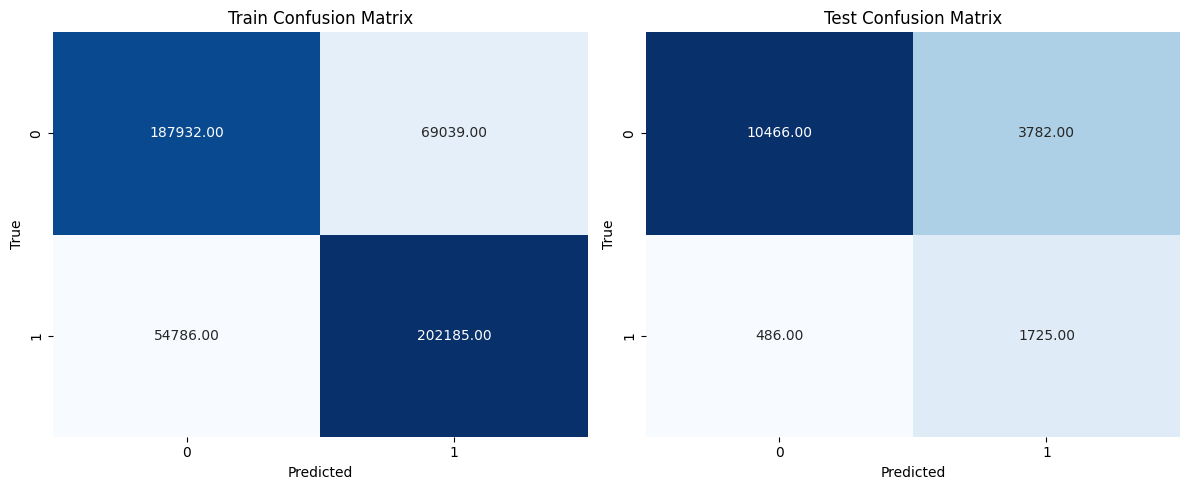

c:\Users\coren\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy train: 0.7454
Accuracy test: 0.7280
F1 Score train: 0.7497
F1 Score test: 0.4181


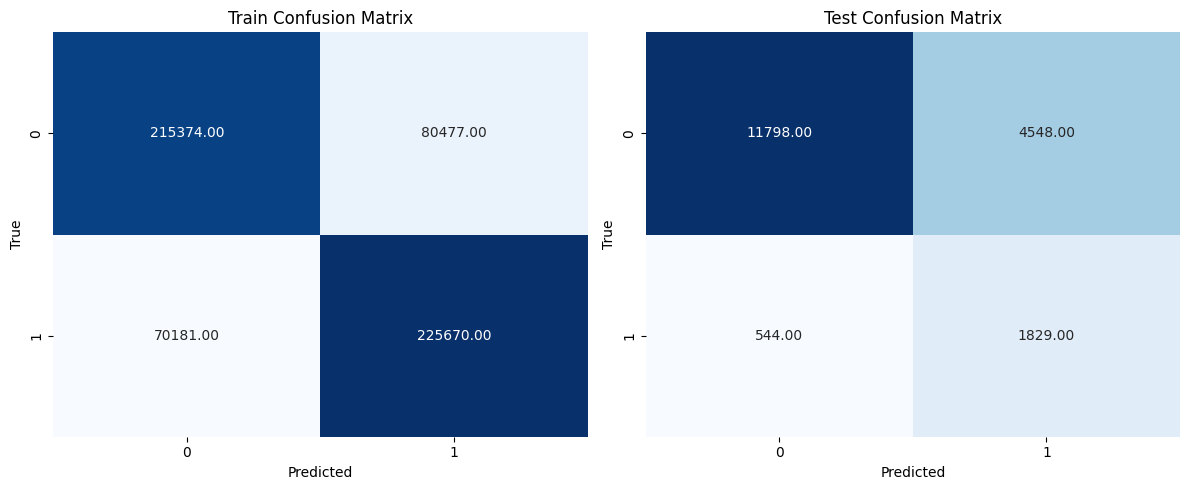

c:\Users\coren\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy train: 0.7575
Accuracy test: 0.7373
F1 Score train: 0.7645
F1 Score test: 0.4506


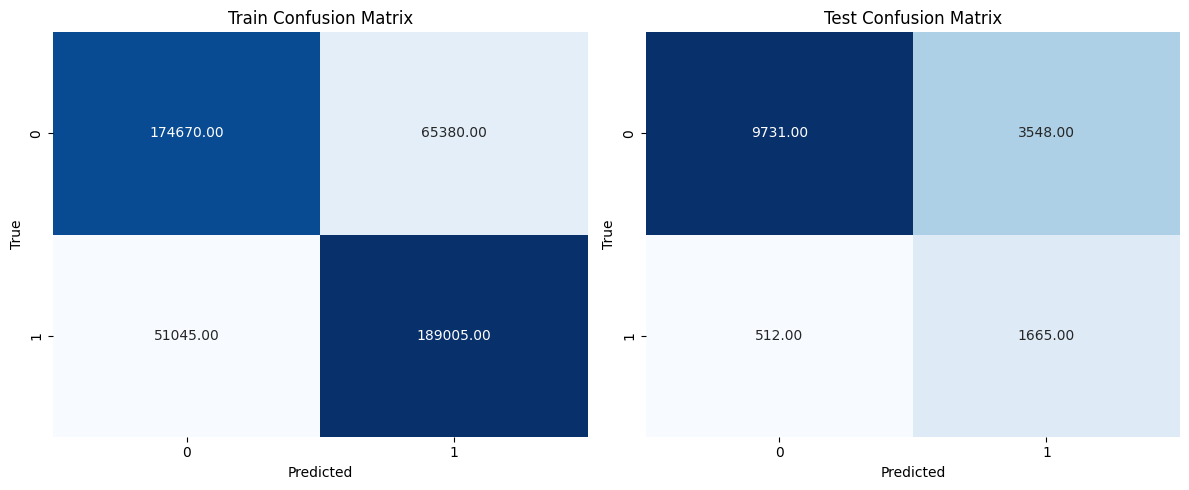

c:\Users\coren\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy train: 0.7430
Accuracy test: 0.7303
F1 Score train: 0.7478
F1 Score test: 0.4089


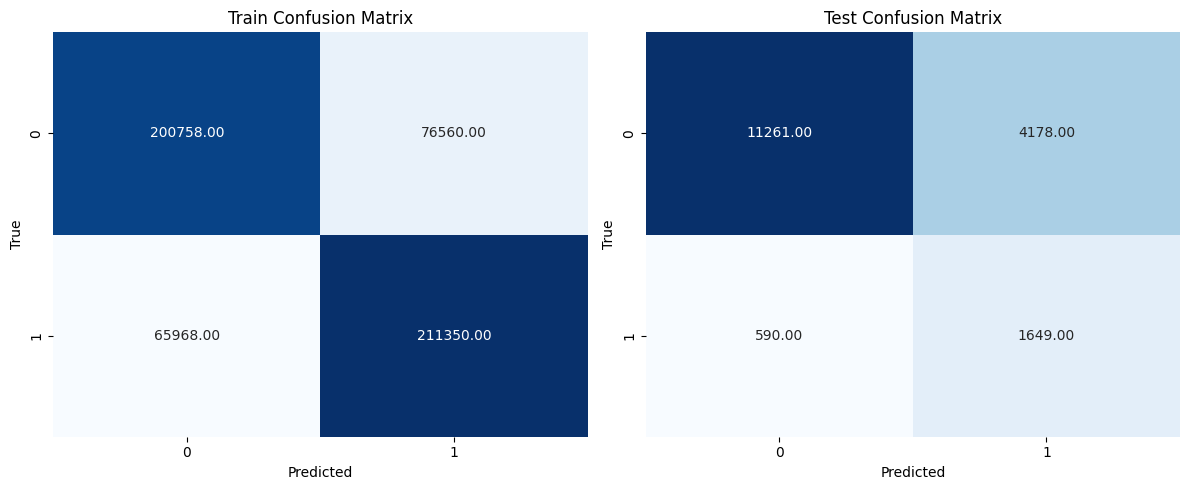

c:\Users\coren\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy train: 0.7525
Accuracy test: 0.7232
F1 Score train: 0.7593
F1 Score test: 0.4439


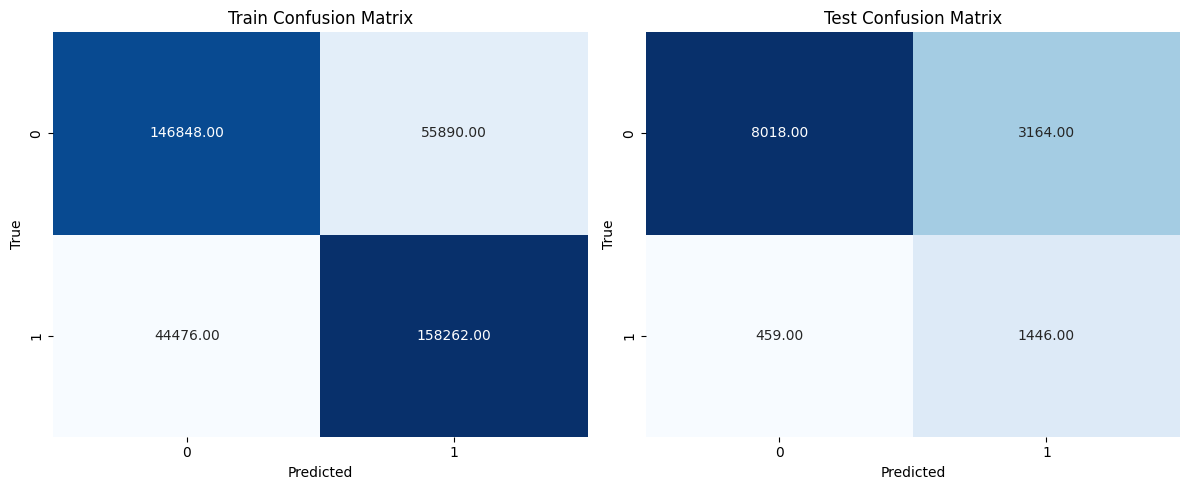

In [56]:
dict_model_logistic = {}
for year in years :
    X_train,Y_train = preprocessed.get_data(year,'Smote',data = 'train')
    X_test,Y_test = preprocessed.get_data(year,'Smote',data = 'test')
    model_logistic,X_train,X_test = train.train_logistic(X_train,Y_train,X_test,Y_test,hyperparameters)
    evaluate.evaluate_model(model_logistic,X_train,Y_train,X_test,Y_test)
    dict_model_logistic[year] = model_logistic
    

### 2- Neural Network

In [60]:
hyperparameters =  {'batch_size' : 64,
                    'optimizer' : 'adam',
                    'learning_rate' : 0.001,
                    'epochs' : 2,
                    'loss' : 'binary_crossentropy'}

hidden_layers = [100,100,100,20]

Epoch 1/2
8031/8031 ━━━━━━━━━━━━━━━━━━━━ 9s 979us/step - accuracy: 0.7250 - loss: 1.7526 - val_accuracy: 0.7488 - val_loss: 0.5573
Epoch 2/2
8031/8031 ━━━━━━━━━━━━━━━━━━━━ 8s 983us/step - accuracy: 0.7518 - loss: 0.5712 - val_accuracy: 0.7562 - val_loss: 0.5369
16061/16061 ━━━━━━━━━━━━━━━━━━━━ 10s 592us/step
515/515 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step
Accuracy train: 0.7541
Accuracy test: 0.7562
F1 Score train: 0.7531
F1 Score test: 0.4513


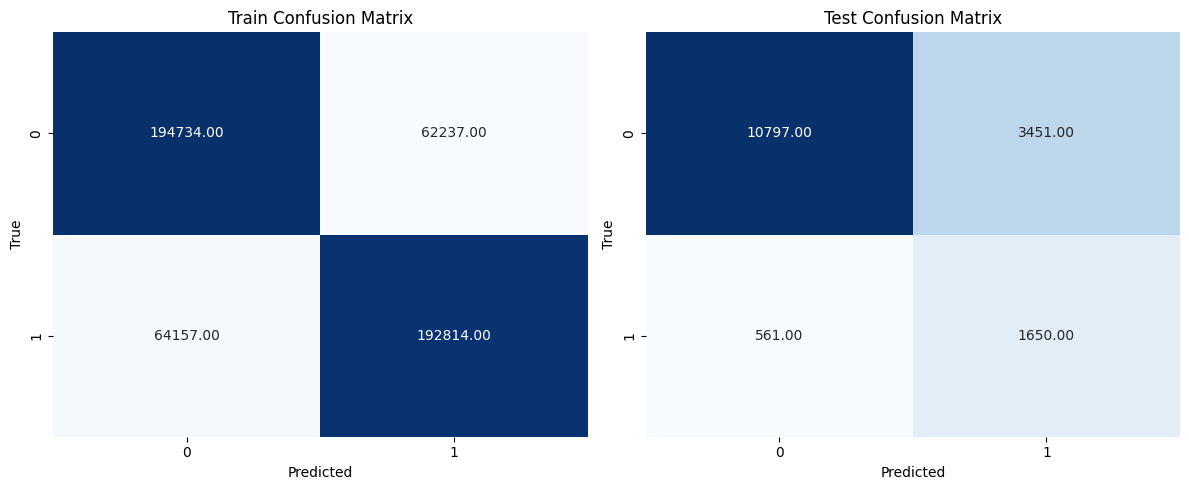

Epoch 1/2
9246/9246 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.7178 - loss: 1.6102 - val_accuracy: 0.7515 - val_loss: 0.5335
Epoch 2/2
9246/9246 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.7431 - loss: 0.5713 - val_accuracy: 0.6903 - val_loss: 0.6112
18491/18491 ━━━━━━━━━━━━━━━━━━━━ 12s 643us/step
585/585 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step
Accuracy train: 0.7474
Accuracy test: 0.6903
F1 Score train: 0.7641
F1 Score test: 0.4026


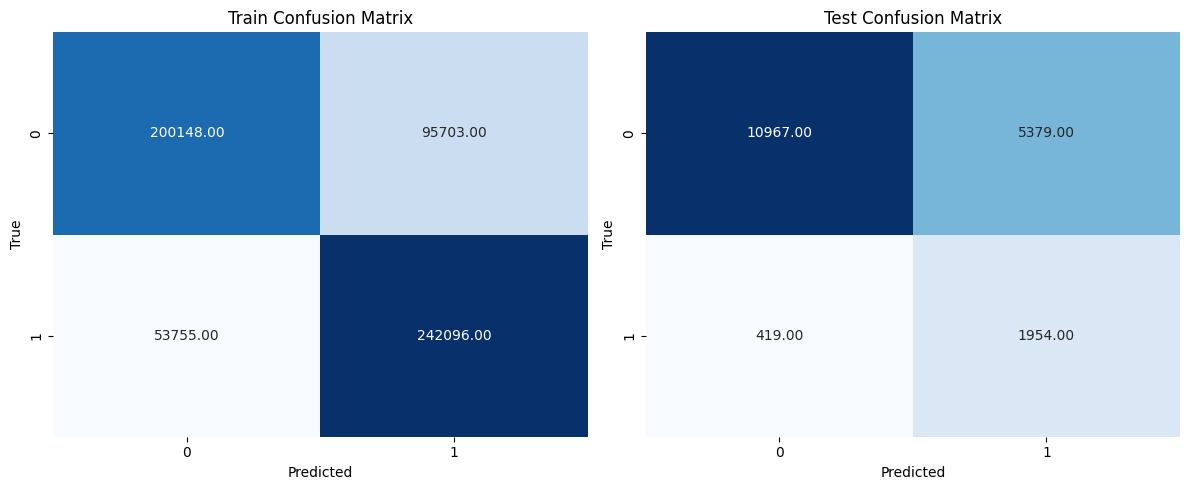

Epoch 1/2
7502/7502 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.7220 - loss: 1.5698 - val_accuracy: 0.6563 - val_loss: 0.6901
Epoch 2/2
7502/7502 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.7509 - loss: 0.5704 - val_accuracy: 0.6738 - val_loss: 0.6457
15004/15004 ━━━━━━━━━━━━━━━━━━━━ 9s 609us/step
483/483 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step
Accuracy train: 0.7510
Accuracy test: 0.6738
F1 Score train: 0.7755
F1 Score test: 0.4232


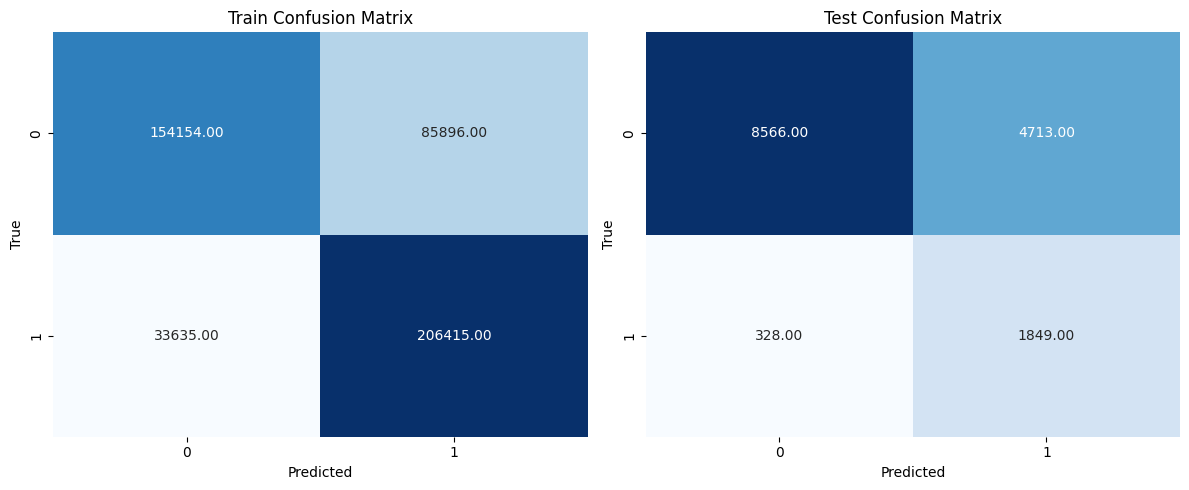

Epoch 1/2
8667/8667 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.7129 - loss: 1.8263 - val_accuracy: 0.7559 - val_loss: 0.5362
Epoch 2/2
8667/8667 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.7402 - loss: 0.5736 - val_accuracy: 0.6793 - val_loss: 0.6261
17333/17333 ━━━━━━━━━━━━━━━━━━━━ 12s 689us/step
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy train: 0.7436
Accuracy test: 0.6793
F1 Score train: 0.7639
F1 Score test: 0.3879


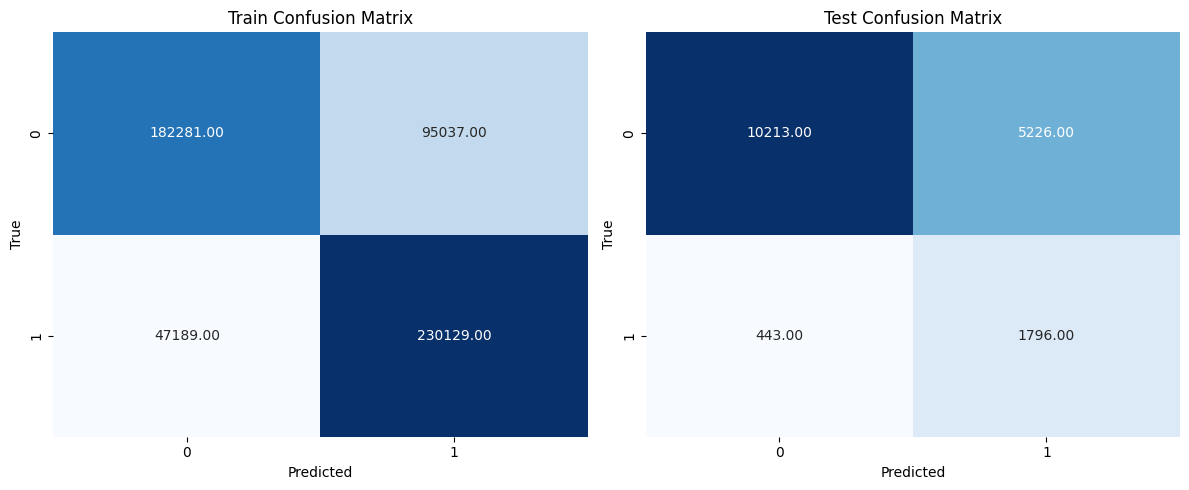

Epoch 1/2
6336/6336 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.7138 - loss: 1.9706 - val_accuracy: 0.6722 - val_loss: 0.6709
Epoch 2/2
6336/6336 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.7455 - loss: 0.5841 - val_accuracy: 0.6636 - val_loss: 0.6637
12672/12672 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step
409/409 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy train: 0.7487
Accuracy test: 0.6636
F1 Score train: 0.7737
F1 Score test: 0.4234


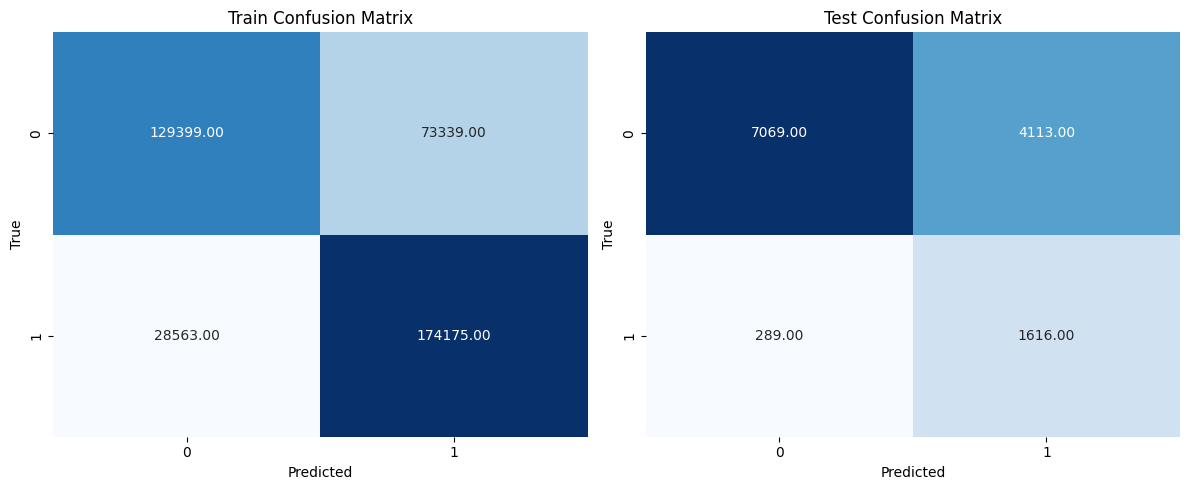

In [ ]:
dict_model = {}
for year in years :
    X_train,Y_train = preprocessed.get_data(year,'Smote',data = 'train')
    X_test,Y_test = preprocessed.get_data(year,'Smote',data = 'test')
    num_input = X_train.shape[1]
    model_year = model.create_sequential_model(num_input,hidden_layers,dropout_rates=0.0,l1_rate=0.0,l2_rate=0.01)
    train.train_model(X_train,Y_train,X_test,Y_test,model_year,hyperparameters)
    evaluate.evaluate_model(model_year,X_train,Y_train,X_test,Y_test)
    dict_model[year] = model_year

In [64]:
hyperparameters_grid =  {'batch_size' : ('log',64,1024,5),
                    'optimizer' : 'adam',
                    'learning_rate' : ('log',0.0001,0.1,10),
                    'epochs' : 2,
                    'loss' : 'binary_crossentropy'}

hidden_layers = [100,100,20]

In [66]:

year = "2011"
X_train,Y_train = preprocessed.get_data(year,'Smote',data = 'train')
X_test,Y_test = preprocessed.get_data(year,'Smote',data = 'test')
num_input = X_train.shape[1]
model_year = model.create_sequential_model(num_input,hidden_layers,dropout_rates=0.0,l1_rate=0.0,l2_rate=0.01)
dist = train.grid_search_train(X_train,Y_train,X_test,Y_test,model_year,hyperparameters_grid)


Training with parameters: {'batch_size': 63.999999999999986, 'optimizer': 'adam', 'learning_rate': 0.0001, 'epochs': 2, 'loss': 'binary_crossentropy'}
Epoch 1/2
8158/8158 ━━━━━━━━━━━━━━━━━━━━ 9s 957us/step - accuracy: 0.7112 - loss: 3.0308 - val_accuracy: 0.7069 - val_loss: 1.1744
Epoch 2/2
8158/8158 ━━━━━━━━━━━━━━━━━━━━ 8s 956us/step - accuracy: 0.7479 - loss: 1.0433 - val_accuracy: 0.7940 - val_loss: 0.7549
Training with parameters: {'batch_size': 63.999999999999986, 'optimizer': 'adam', 'learning_rate': 0.00021544346900318845, 'epochs': 2, 'loss': 'binary_crossentropy'}
Epoch 1/2
8158/8158 ━━━━━━━━━━━━━━━━━━━━ 8s 931us/step - accuracy: 0.7520 - loss: 0.7760 - val_accuracy: 0.6925 - val_loss: 0.7164
Epoch 2/2
8158/8158 ━━━━━━━━━━━━━━━━━━━━ 7s 910us/step - accuracy: 0.7552 - loss: 0.6332 - val_accuracy: 0.7015 - val_loss: 0.6448
Training with parameters: {'batch_size': 63.999999999999986, 'optimizer': 'adam', 'learning_rate': 0.00046415888336127773, 'epochs': 2, 'loss': 'binary_crosse

In [69]:
print(dist)

[{'params': {'batch_size': 63.999999999999986, 'optimizer': 'adam', 'learning_rate': 0.0001, 'epochs': 2, 'loss': 'binary_crossentropy'}, 'test_loss': (0.754934549331665, 0.7940336465835571)}, {'params': {'batch_size': 63.999999999999986, 'optimizer': 'adam', 'learning_rate': 0.00021544346900318845, 'epochs': 2, 'loss': 'binary_crossentropy'}, 'test_loss': (0.6447752118110657, 0.7015007138252258)}, {'params': {'batch_size': 63.999999999999986, 'optimizer': 'adam', 'learning_rate': 0.00046415888336127773, 'epochs': 2, 'loss': 'binary_crossentropy'}, 'test_loss': (0.5309222340583801, 0.7551491856575012)}, {'params': {'batch_size': 63.999999999999986, 'optimizer': 'adam', 'learning_rate': 0.001, 'epochs': 2, 'loss': 'binary_crossentropy'}, 'test_loss': (0.4875538647174835, 0.7799380421638489)}, {'params': {'batch_size': 63.999999999999986, 'optimizer': 'adam', 'learning_rate': 0.002154434690031882, 'epochs': 2, 'loss': 'binary_crossentropy'}, 'test_loss': (0.7201653122901917, 0.6254936456